In [ ]:
import numpy as np

def reduzir_dimensionalidade_manual(imagem_rgb, threshold = 127):
    """
    Reduz manualmente uma imagem RGB para:
    - Tons de cinza
    - Binária (preto e branco)
    
    Parâmetro:
        imagem_rgb: array NumPy que representa o RGB com valores de 0 a 255, apresentando shape (H, W, 3)

    Retorna:
        imagem_cinza, imagem_binaria
    """
    # Verifica se a imagem tem 3 canais
    if imagem_rgb.shape[-1] != 3:
        print(f'A imagem tem {imagem_rgb.shape[-1]} canais')
        
    # Quebra os canais, pegando a terceira dimensão
    R = imagem_rgb[:, :, 0].astype(float)
    G = imagem_rgb[:, :, 1].astype(float)
    B = imagem_rgb[:, :, 2].astype(float)

    # Conversão manual para cinza (luminosidade)
    imagem_cinza = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

    # Binarização: aplica threshold para conversão do binário, deixei como padrão 127, mas é possível explorar outros
    imagem_binaria = np.where(imagem_cinza > threshold, 255, 0).astype(np.uint8)

    return imagem_cinza, imagem_binaria


As dimensões da imagem são: altura - 225, largura - 672 e canais de cor (RGB) - 4
A imagem tem 4 canais


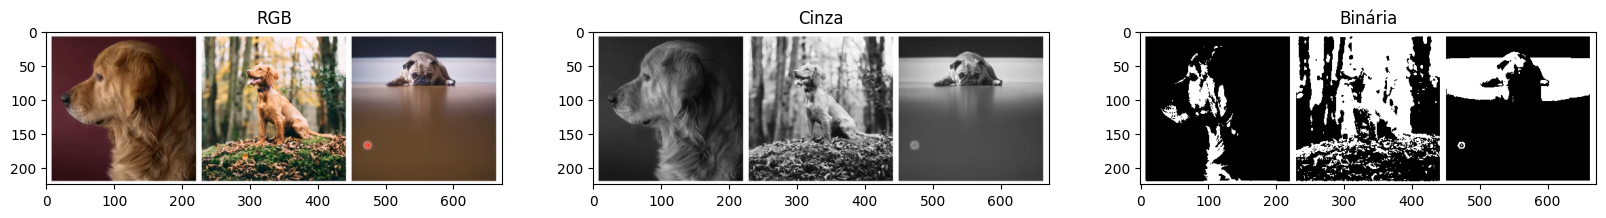

In [45]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Carrega imagem como array (por exemplo usando matplotlib)
imagem = imread(r"C:\Users\mrcsf\OneDrive\Imagens\Screenshots\Captura de tela 2025-05-02 181248.png")  # retorna a matriz de pixels

print(f'As dimensões da imagem são: altura - {imagem.shape[0]}, largura - {imagem.shape[1]} e canais de cor (RGB) - {imagem.shape[2]}')

# Aplicar essa condição para caso os valores dos arrays sejam 0 e 1
if imagem.max() <= 1.0:
    imagem = (imagem * 255).astype(np.uint8)

# Aplica função
cinza, binaria = reduzir_dimensionalidade_manual(imagem) # O threshold padrão é 127, mas é possível mudar para mexer na imagem binária, quanto menor, mais partes brancas

# Mostra os resultados
plt.figure(figsize = (20,10))
plt.subplot(1, 3, 1)
plt.imshow(imagem)
plt.title("RGB")


plt.subplot(1, 3, 2)
plt.imshow(cinza, cmap='gray')
plt.title("Cinza")

plt.subplot(1, 3, 3)
plt.imshow(binaria, cmap='gray')
plt.title("Binária")

plt.show()
